# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

output_df = pd.read_csv(output_data_file)
output_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

units = ["imperial"]

# set up lists to hold values
new_cities = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0

# Build query URL
query_url = f"{url}appid={weather_api_key}&q={city}"
# print(query_url)

print("Beginning Data Retrieval")
print("------------------------")

# loop through cities to perform a weather check
for city in cities:

    # Build query URL based on each city
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
#     print(weather_json)

    # Try & Except clause to catch any NaN cities
    try:
    # Append values to the previously defined lists
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        new_cities.append(city)
    
        # Counter to track city #'s
        count = count + 1
        print(f"Processing Record {count}: {city}")

    except KeyError:
        print(f"City not found. Skipping...")
    
print("------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------
Processing Record 1: shimoda
Processing Record 2: teya
Processing Record 3: menongue
Processing Record 4: nikolskoye
Processing Record 5: carnarvon
Processing Record 6: pontianak
Processing Record 7: arua
Processing Record 8: mataura
Processing Record 9: kargopol
Processing Record 10: dikson
Processing Record 11: arraial do cabo
Processing Record 12: avarua
Processing Record 13: jamestown
City not found. Skipping...
Processing Record 14: rikitea
Processing Record 15: vaini
Processing Record 16: tourlaville
Processing Record 17: torbay
Processing Record 18: hithadhoo
Processing Record 19: khalilabad
Processing Record 20: hilo
Processing Record 21: yellowknife
City not found. Skipping...
Processing Record 22: sisimiut
Processing Record 23: faanui
Processing Record 24: punta arenas
Processing Record 25: kapaa
Processing Record 26: coihaique
Processing Record 27: cherskiy
Processing Record 28: salalah
Processing Record 29: sonoita
Processin

City not found. Skipping...
Processing Record 239: inongo
Processing Record 240: flin flon
Processing Record 241: laguna
Processing Record 242: umm lajj
Processing Record 243: codrington
Processing Record 244: yulara
Processing Record 245: tharad
Processing Record 246: dolores
City not found. Skipping...
Processing Record 247: noumea
Processing Record 248: jamame
Processing Record 249: cairns
City not found. Skipping...
Processing Record 250: margate
Processing Record 251: bethel
Processing Record 252: sorland
Processing Record 253: isangel
Processing Record 254: melfi
Processing Record 255: cockburn town
Processing Record 256: panguna
Processing Record 257: samarai
Processing Record 258: manhattan
Processing Record 259: adre
Processing Record 260: jalu
City not found. Skipping...
Processing Record 261: talnakh
City not found. Skipping...
Processing Record 262: pangody
Processing Record 263: fort walton beach
Processing Record 264: sanchazi
Processing Record 265: hof
Processing Record 

Processing Record 470: siparia
Processing Record 471: pangai
Processing Record 472: saint-leu
Processing Record 473: chumikan
Processing Record 474: mogadishu
Processing Record 475: klaksvik
Processing Record 476: erzin
Processing Record 477: wangqing
Processing Record 478: dehloran
Processing Record 479: mezhdurechenskiy
Processing Record 480: poltavka
Processing Record 481: ladyzhyn
Processing Record 482: miri
Processing Record 483: shahrud
Processing Record 484: erenhot
Processing Record 485: duvan
Processing Record 486: beira
Processing Record 487: magadan
Processing Record 488: grand-lahou
Processing Record 489: bireun
Processing Record 490: atyrau
City not found. Skipping...
Processing Record 491: el alto
Processing Record 492: acapulco
Processing Record 493: maracaju
Processing Record 494: nanzhang
Processing Record 495: aginskoye
Processing Record 496: sohag
Processing Record 497: kyaikkami
Processing Record 498: moroto
Processing Record 499: la campana
Processing Record 500: s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# create a data frame from City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
weather_dict = {
    "City": new_cities,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shimoda,34.67,138.95,286.15,66,75,6.20,JP,1587087051
1,teya,60.38,92.63,277.90,67,73,0.40,RU,1587087052
2,menongue,-14.66,17.69,289.25,56,13,0.71,AO,1587087052
3,nikolskoye,59.70,30.79,275.15,74,75,6.00,RU,1587087052
4,carnarvon,-24.87,113.63,304.15,35,61,4.60,AU,1587086981
...,...,...,...,...,...,...,...,...,...
537,aguas formosas,-17.08,-40.94,294.74,86,22,0.39,BR,1587087203
538,east hemet,33.74,-116.94,296.15,51,1,5.10,US,1587087203
539,pontes e lacerda,-15.23,-59.34,290.36,70,5,1.36,BR,1587087203
540,beroroha,-21.67,45.17,294.85,61,0,4.31,MG,1587087203


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,20.644280,17.069520,288.602620,66.841328,49.671587,3.601697,1.587087e+09
std,33.273576,92.027553,11.294635,21.697652,38.612860,2.230779,7.909611e+01
min,-54.800000,-175.200000,254.100000,8.000000,0.000000,0.310000,1.587086e+09
25%,-6.575000,-67.627500,281.150000,53.250000,7.000000,1.895000,1.587087e+09
50%,26.560000,22.755000,289.770000,70.000000,46.000000,3.190000,1.587087e+09
75%,49.235000,101.037500,298.090000,84.000000,90.000000,4.875000,1.587087e+09
max,78.220000,179.320000,308.710000,100.000000,100.000000,15.400000,1.587087e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [36]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_data.to_csv('weather_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

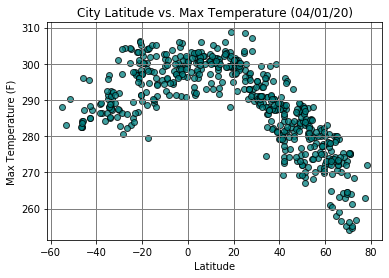

In [39]:
# Define x- and y-axis
x_axis = weather_data["Lat"]
y_axis = weather_data["Max Temp"]

# Create the scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show

# Brief analysis
print("")

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

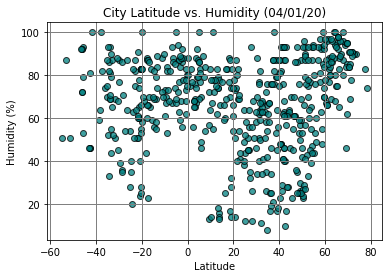

In [40]:
# Define x- and y-axis
x_axis = weather_data["Lat"]
y_axis = weather_data["Humidity"]

# Create the scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

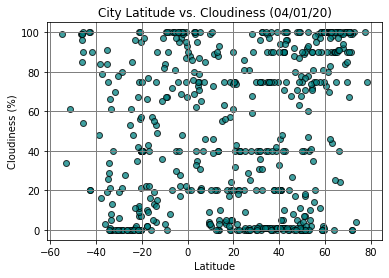

In [41]:
# Define x- and y-axis
x_axis = weather_data["Lat"]
y_axis = weather_data["Cloudiness"]

# Create the scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

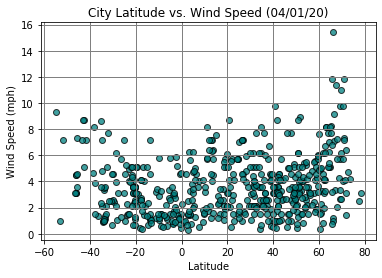

In [42]:
# Define x- and y-axis
x_axis = weather_data["Lat"]
y_axis = weather_data["Wind Speed"]

# Create the scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


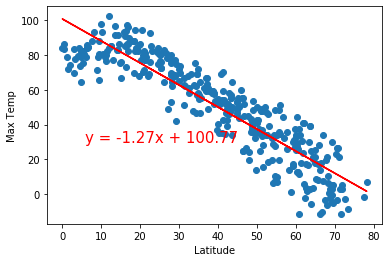

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


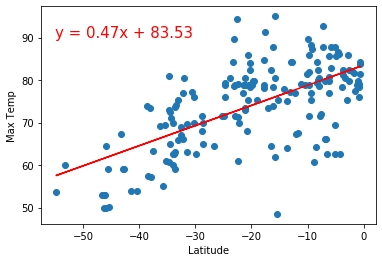

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


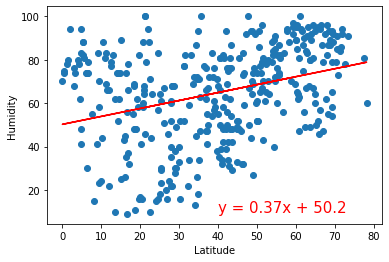

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


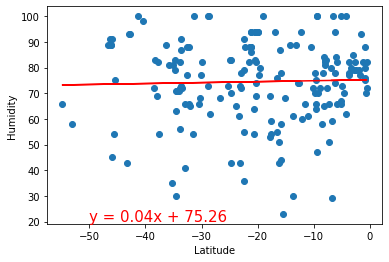

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


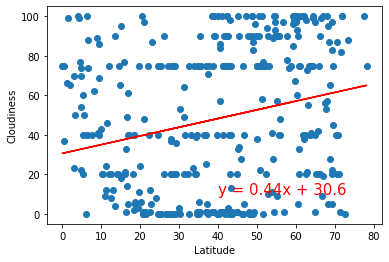

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


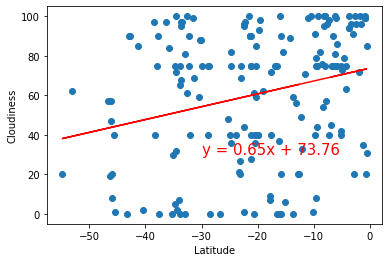

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


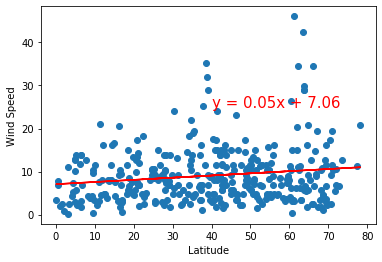

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


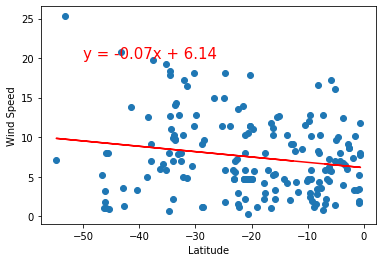